## Implementation of Neural Netwok using BackPropagation 
- Change in weights to minimize the cost of the model 
- Change in bias to minimize the cost of the model 

### About the neural Network 
1. Input layer = 1
2. Hidden layer = 2 (7 Neurons & 6 Neurons)
3. Output layer = 2 (2 Neurons)

![Neural Network Image](../Img/neural_network_image1.png)

- Total number of weight: - **w** = 7 * 6 * 2 * 1 = 84
- Total number of bias: - **b** = 2 + 7 + 6 = 15

In [166]:
%run "training_data.ipynb"

In [167]:
#loading libraries
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [168]:
#Define activation function (Using: exponential function)
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z / 2) ** 2 / 4

def reset_network(n1 = 6, n2 = 7, random = np.random):
    global w1, w2, w3, b1, b2, b3
    #Define the weights & bias initial values 
    w1 = random.randn(n1, 1) / 2    #w1 = 6 * 1
    w2 = random.randn(n2, n1) / 2   #w2 = 7 * 6
    w3 = random.randn(2, n2) / 2    #w3 = 2 * 7

    b1 = random.randn(n1, 1) / 2    #b1 = 6 * 1
    b2 = random.randn(n2, 1) / 2    #b2 = 7 * 1
    b3 = random.randn(2, 1) / 2     #b3 = 2 * 1

    
#Defination of feed Forward 
def neural_network (a0): 
    #At layer 1 
    a1 = w1 @ a0 + b1
    z1 = sigma(a1)

    #At layer 2
    a2 = w2 @ a1 + b2
    z2 = sigma(a2)

    #At layer 3
    a3 = w3 @ a2 + b3
    z3 = sigma(a3)

    return a0, a1, z1, a2, z2, a3, z3

### Change in cost with respect to change in weights, bias
- Now need to calculate how change in weights and bias can affect cost of the model.  
- In neural network, we always want to minimize cost of the model to train it. 
---
1. Need to calculate change in weight & bias in each level and sum up the cost factor 

In [169]:
#Change in weight and Bias in level 3 

#Change in weight 
def cost_weight_l3(x, y):
    #Send input to neural network 
    a0, a1, z1, a2, z2, a3, z3 = neural_network(x)
    #Calcutating cost w.r.t weight
    C = 2 * (a3 - y)
    C = C * d_sigma(z3)
    C = C @ a2.T / x.size

    return C

#Change in bias
def cost_bias_l3(x, y): 
    #Send input to neural network 
    a0, a1, z1, a2, z2, a3, z3 = neural_network(x)
    #Calculating cost w.r.t bias 
    C = 2 * (a3 - y)
    C = C * d_sigma(z3)
    C = np.sum(C, axis=1, keepdims=True) / x.size #Since, change in bias w.r.t cost is 1
    
    return C

In [170]:
#Change in weight and Bias in level 2 

#Change in weight 
def cost_weight_l2(x, y):
    #Send input to neural network 
    a0, a1, z1, a2, z2, a3, z3 = neural_network(x)
    #Calcutating cost w.r.t weight
    C = 2 * (a3 - y)
    C = C * d_sigma(z3)
    C = (C.T @ w3).T
    C = C * d_sigma(z2)
    C = (C @ a1.T) / x.size

    return C

#Change in bias
def cost_bias_l2(x, y): 
    #Send input to neural network 
    a0, a1, z1, a2, z2, a3, z3 = neural_network(x)
    #Calculating cost w.r.t bias 
    C = 2 * (a3 - y)
    C = C * d_sigma(z3)
    C = (C.T @ w3).T
    C = C * d_sigma(z2)
    C = np.sum(C, axis=1, keepdims=True) / x.size  #Since, change in bias w.r.t cost is 1
    
    return C

In [171]:
#Change in weight and Bias in level 1

#Change in weight 
def cost_weight_l1(x, y):
    #Send input to neural network 
    a0, a1, z1, a2, z2, a3, z3 = neural_network(x)
    #Calcutating cost w.r.t weight
    C = 2 * (a3 - y)
    C = C * d_sigma(z3)
    C = (C.T @ w3).T
    C = C * d_sigma(z2)
    C = (C.T @ w2).T
    C = C * d_sigma(z1)
    C = (C @ a0.T) / x.size

    return C

#Change in bias
def cost_bias_l1(x, y): 
    #Send input to neural network 
    a0, a1, z1, a2, z2, a3, z3 = neural_network(x)
    #Calculating cost w.r.t bias 
    C = 2 * (a3 - y)
    C = C * d_sigma(z3)
    C = (C.T @ w3).T
    C = C * d_sigma(z2)
    C = (C.T @ w2).T
    C = C * d_sigma(z1)
    C = np.sum(C, axis=1, keepdims=True) / x.size  #Since, change in bias w.r.t cost is 1
    
    return C

### Training Model 
- Get trained model input & expected output to train the model 
- Have Stochastic Gradient Descent to train inputs on the Model 
- Minimize cost by reducing weight and bias 

In [172]:
#Trained Expected data
x, y = training_data()
reset_network()

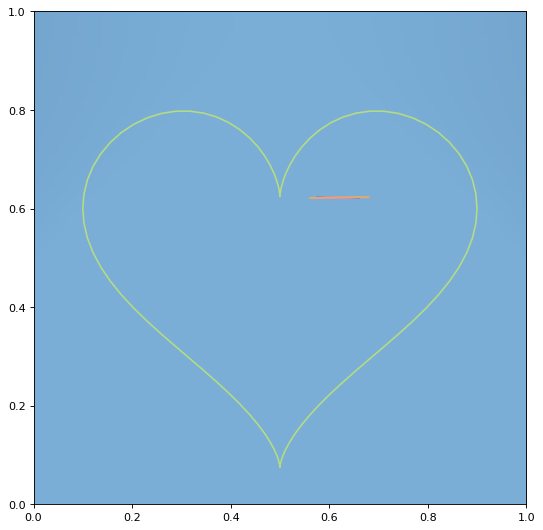

In [178]:
plot_training(x, y, iterations = 10000, learningRate = 0.001, noise = 1)